## Wersja G - 10-ręki bandyta - greedy

## Problem wielorękiego bandyty
Na zajęciach rozważaliśmy zadanie wielorękiego bandyty:

Mamy wiele maszyn, z których każde ma pewną nieznaną funkcję nagrody. "Granie" polega na wyborze maszyny, od której nagrodę otrzymamy. Celem jest granie tak, aby zdobyć sumarycznie jak największą nagrodę.

## Eksploracja kontra eksploatacja

Aby zdobyć dużą nagrodę, agent chciałby grać często na maszynie, która do tej pory się sprawdzała. Powinien jednak czasem grać na tych mniej obiecujących, bo być może okażą się one lepsze.

## Zadanie
Zreprodukuj obrazek 2.3 ze strony 34 "Reinforcement Learning: An Introduction" Sutton, Barto. Czyli:

Estymuj wartość średnią bandyty przy pomocy wzoru $Q_{n+1} = Q_n + \alpha_n\cdot (R_n - Q_n)$, gdzie $\alpha = 0.1$.

Porównaj 2 podejścia:

1. eps-greedy gdzie $\varepsilon = 0.1$, $Q_1 = 0$
2. greedy gdzie $Q_1 = 5$

Narysuj wykres 2D, gdzie na osi OX będzie liczba gier, a na osi OY % wyborów najlepszego bandyty.

### Wersja g
Mamy 10 bandytów:

1. $Bernoulli(0.6)$, czyli 1 z p-stwem 0.6, 0 z p-stwem 0.4
1. $Bernoulli(0.5)$
1. $Bernoulli(0.5)$
1. $Bernoulli(0.5)$
1. $Bernoulli(0.5)$
1. $Bernoulli(0.5)$
1. $Bernoulli(0.5)$
1. $Bernoulli(0.5)$
1. $Bernoulli(0.5)$
1. $Bernoulli(0.5)$

In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
class BernoulliBandit:
    def __init__(self, p=0.5):
        self.p = p
    def draw(self):
        return np.random.random() < self.p

In [24]:
propabilities = [0.5]*10; propabilities[0] = 0.6
bandits = [BernoulliBandit(p) for p in propabilities]
qn = [0]*10; eps = 0.1; alpha = 0.1

In [25]:
def eps_greedy(qn, eps):
    if eps!=0 and np.random.random() < eps:
        return np.random.choice(len(qn))
    else:
        return np.argmax(qn)

def qn_update(qn,r, alpha=0.1):
    return qn + alpha*(r-qn)

def play_bandits(bandits, qn, eps, n_steps):
    best_bandit = np.argmax([bandit.p for bandit in bandits])
    best_bandit_choosen = 0
    score=[0]*n_steps;
    for i in range(n_steps):
        bandit_idx = eps_greedy(qn, eps)
        if bandits[bandit_idx].draw():
            r = 1
        else:
            r = 0
        qn[bandit_idx] = qn_update(qn[bandit_idx], r)
        if bandit_idx == best_bandit:
            best_bandit_choosen += 1
        score[i] = best_bandit_choosen/(i+1)
    return score

print(play_bandits(bandits, qn, eps, 100))

[1.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.3333333333333333, 0.2857142857142857, 0.25, 0.2222222222222222, 0.2, 0.18181818181818182, 0.16666666666666666, 0.15384615384615385, 0.14285714285714285, 0.13333333333333333, 0.125, 0.11764705882352941, 0.1111111111111111, 0.10526315789473684, 0.1, 0.09523809523809523, 0.09090909090909091, 0.08695652173913043, 0.08333333333333333, 0.08, 0.07692307692307693, 0.07407407407407407, 0.07142857142857142, 0.06896551724137931, 0.06666666666666667, 0.06451612903225806, 0.0625, 0.06060606060606061, 0.058823529411764705, 0.05714285714285714, 0.05555555555555555, 0.05405405405405406, 0.05263157894736842, 0.05128205128205128, 0.05, 0.04878048780487805, 0.047619047619047616, 0.046511627906976744, 0.045454545454545456, 0.044444444444444446, 0.043478260869565216, 0.0425531914893617, 0.041666666666666664, 0.04081632653061224, 0.04, 0.0392156862745098, 0.038461538461538464, 0.03773584905660377, 0.037037037037037035, 0.03636363636363636, 0.03571428571428571, 0.03

<Axes: >

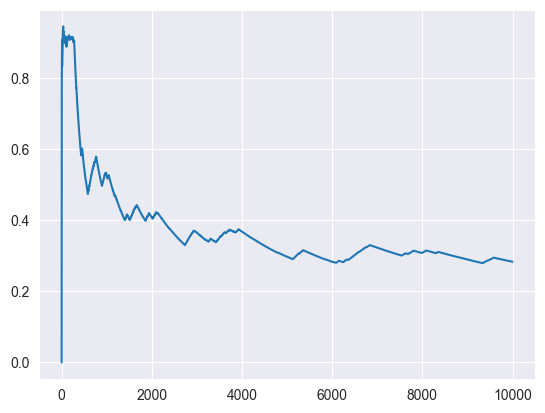

In [26]:
# realistic_eps_greedy
qn=[0]*10; eps = 0.1
realistic_eps_greedy = play_bandits(bandits, qn.copy(), eps, 10000)
sns.lineplot(x=range(10000), y=realistic_eps_greedy)

<Axes: >

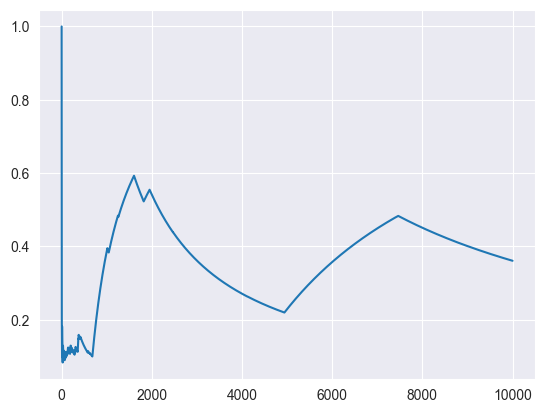

In [27]:
# optimistic_greedy
qn=[5]*10; eps = 0
optimistic_greedy = play_bandits(bandits, qn.copy(), eps, 10000)
sns.lineplot(x=range(10000), y=optimistic_greedy)

In [28]:
#create dataframe
df = pd.DataFrame({'realistic_eps_greedy': realistic_eps_greedy, 'optimistic_greedy': optimistic_greedy, 'n': range(10000)})
df

,realistic_eps_greedy,optimistic_greedy,n
0,0.000000,1.000000,0
1,0.500000,0.500000,1
2,0.666667,0.333333,2
3,0.750000,0.250000,3
4,0.800000,0.200000,4
...,...,...,...
9995,0.283713,0.360944,9995
9996,0.283685,0.360908,9996
9997,0.283657,0.360872,9997
9998,0.283628,0.360836,9998


/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_1532/2976433127.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Optimal bandit choice according to number of rounds in game')

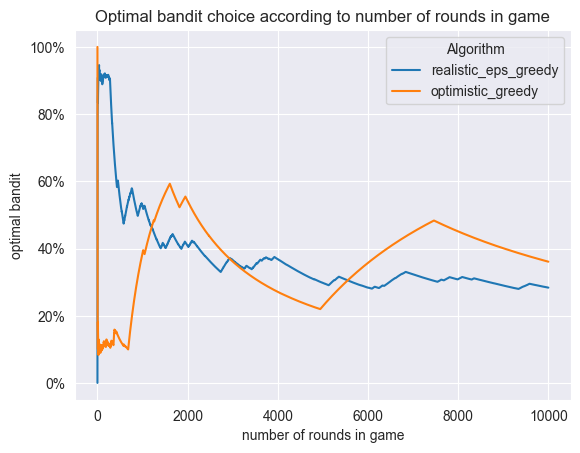

In [29]:
# visualize
sns.lineplot(x='n', y='value', hue='variable', data=pd.melt(df, ['n']))
# name axes
import matplotlib.pyplot as plt
plt.xlabel('number of rounds in game')
plt.ylabel('optimal bandit')
# y axis *100
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
# change legend
plt.legend(title='Algorithm')
# change title
plt.title('Optimal bandit choice according to number of rounds in game')

### Obserwacje
Ten wykres przedstawia procent wyboru najlepszego bandyty w zależności od liczby gier. Jest to przebieg jednej gry. Z powodu tego że jest bardzo specyficzny rozkład, podejście realistic_eps_greedy jest bardzo dobre na początku, gdy w grze jest mało rund, bo wtedy od razu prawie wybiera najlepszego bandytę, bo każdy bandyta jest z bardzo prostego rozkładu. Dla większej ilości rund lepsze jest podejście optimistic greedy, w który potrzeba trochę czasu na wybranie najlepszego bandyty, ale po pewnym czasie wybiera go zdecydowanie częściej niż realistic_eps_greedy. 

### Co można inaczej? - Bonus

- Wydaje mi się, że wzięcie dobrych rzeczy z obu podejść i połączenie ich w jedno mogłoby dać lepsze wyniki, czyli $Q_1=3$ i $\varepsilon=0.05$, co jest bardzo specyficzne dla tego, że ci bandyci są z bardzo prostego rozkładu, ale w innych przypadkach może to być bardzo złe podejście, szczególnie jeśli rozkłady bandytów będą się zmieniać w czasie. To będzie takie połączenie obu podejść.

To moje nowe podejście nazwę light_optimistic_eps_greedy


<Axes: >

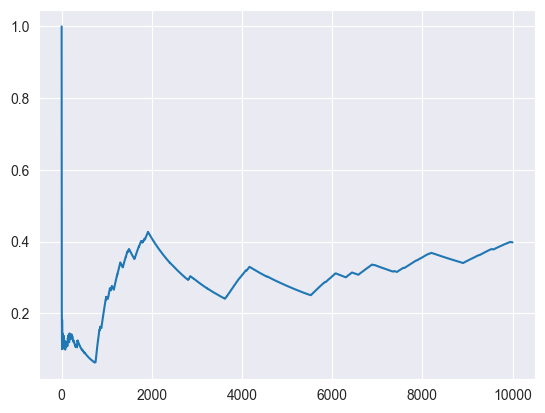

In [30]:
# light_optimistic_eps_greedy
qn=[3]*10; eps = 0.05
light_optimistic_eps_greedy = play_bandits(bandits, qn.copy(), eps, 10000)
sns.lineplot(x=range(10000), y=light_optimistic_eps_greedy)

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_1532/469901741.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Optimal bandit choice according to number of rounds in game')

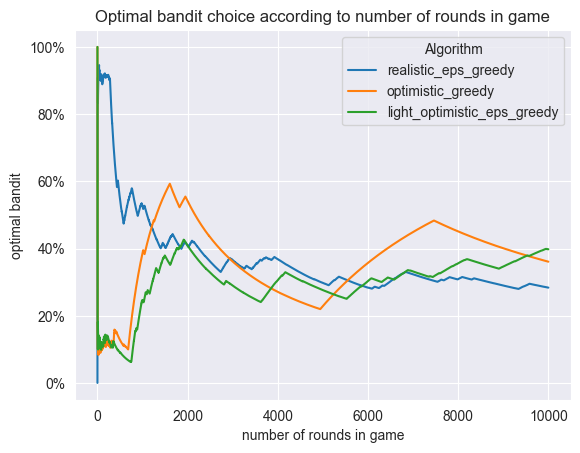

In [31]:
df= pd.DataFrame({'realistic_eps_greedy': realistic_eps_greedy, 'optimistic_greedy': optimistic_greedy, 'light_optimistic_eps_greedy': light_optimistic_eps_greedy, 'n': range(10000)})
sns.lineplot(x='n', y='value', hue='variable', data=pd.melt(df, ['n']))
plt.xlabel('number of rounds in game')
plt.ylabel('optimal bandit')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend(title='Algorithm')
plt.title('Optimal bandit choice according to number of rounds in game')

### Obserwacje
- Moje nowe podejście okazało się nie takie dobre jak mi się wydawało.
- light_optimistic_eps_greedy wydaje się gorsze od obu podejść, które porównywałem wcześniej.
- Raczej preferowałbym wybierać jedno z tamtych podejść zamiast je łączyć.

### Co można dalej zrobić? - Bonus
- Rozważę kilka gier i dla każdej liczby rund wezmę średnią z kilku gier, żeby zobaczyć jak wygląda to w praktyce.

In [29]:
# realistic_eps_greedy 
qn=[0]*10; eps = 0.1
# create matrix to store results 10x10000
realistic_eps_greedy = np.zeros((10,10000))
# play 10 games
for i in range(10):
    realistic_eps_greedy[i] = play_bandits(bandits, qn.copy(), eps, 10000)
# take mean
realistic_eps_greedy = np.mean(realistic_eps_greedy, axis=0)

In [30]:
# optimistic_greedy
qn=[5]*10; eps = 0
optimistic_greedy = np.zeros((10,10000))
for i in range(10):
    optimistic_greedy[i] = play_bandits(bandits, qn.copy(), eps, 10000)
optimistic_greedy = np.mean(optimistic_greedy, axis=0)

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_1189/250391403.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Optimal bandit choice according to number of rounds in game')

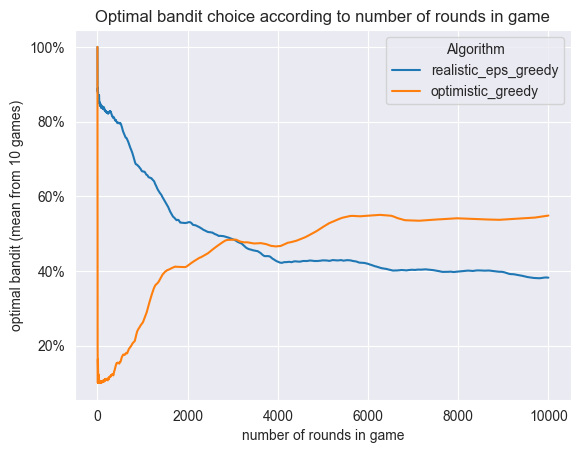

In [31]:
df= pd.DataFrame({'realistic_eps_greedy': realistic_eps_greedy, 'optimistic_greedy': optimistic_greedy, 'n': range(10000)})
sns.lineplot(x='n', y='value', hue='variable', data=pd.melt(df, ['n']))
plt.xlabel('number of rounds in game')
plt.ylabel('optimal bandit (mean from 10 games)')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend(title='Algorithm')
plt.title('Optimal bandit choice according to number of rounds in game')

### Obserwacje
- Wyniki są bardzo podobne do tych z pojedynczej gry, ale wyglądają na bardziej stabilne.
- Wykres bardzo się ustabilizował, mniej poszarpany, bo wzięliśmy średnią z 10 gier.

### Wnioski
- Jeśli wiemy z jakich rozkładów mogą losować bandyci, to możemy zastosować różne podejścia, żeby wybrać najlepsze podejście.
- To jakie podejście jest najlepsze zależy od tego jacy są bandyci.
- Podejście realistic_eps_greedy jest lepsze dla małej ilości rund niż optimistic_greedy, które sprawdza się lepiej dla dużej ilości gier.
- realistic_eps_greedy trzyma się początkowo dobrych decyzji, ale przez zachęcanie do spontanicznej eksporacji w dłuższej perspektywie stabilizuje się na poziomie 40% wyborach optymalnego bandyty
- optimistic_greedy zachęca do początkowej sporej eksploracji, przez co na początku wybiera każdego bandytę w miarę po równo, po około 3000 rundach już na tyle zna bandytów, że 50% decyzji jest optymalna i dalej stabilizuje się na 60% optymalnych decyzji


Wydaje mi się, że wykres może trochę inaczej wyglądać jeśli przepermutuję bandytów w tablicy bandytów.

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_1532/3440641103.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Optimal bandit choice according to number of rounds in game')

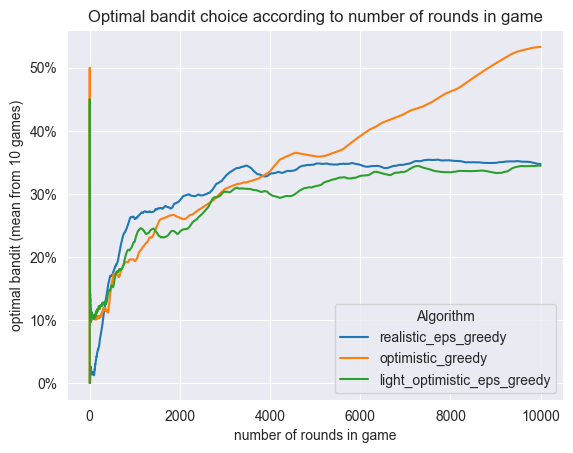

In [32]:
# shuffle bandits
np.random.shuffle(bandits)

# realistic_eps_greedy 
qn=[0]*10; eps = 0.1
# create matrix to store results 10x10000
realistic_eps_greedy = np.zeros((10,10000))
# play 10 games
for i in range(10):
    realistic_eps_greedy[i] = play_bandits(bandits, qn.copy(), eps, 10000)
# take mean
realistic_eps_greedy = np.mean(realistic_eps_greedy, axis=0)

# optimistic_greedy
qn = [5] * 10;
eps = 0
optimistic_greedy = np.zeros((10, 10000))
for i in range(10):
    optimistic_greedy[i] = play_bandits(bandits, qn.copy(), eps, 10000)
optimistic_greedy = np.mean(optimistic_greedy, axis=0)

# light_optimistic_eps_greedy
qn=[3]*10; eps = 0.05
light_optimistic_eps_greedy = np.zeros((10,10000))
for i in range(10):
    light_optimistic_eps_greedy[i] = play_bandits(bandits, qn.copy(), eps, 10000)
light_optimistic_eps_greedy = np.mean(light_optimistic_eps_greedy, axis=0)

df= pd.DataFrame({'realistic_eps_greedy': realistic_eps_greedy, 'optimistic_greedy': optimistic_greedy, 'light_optimistic_eps_greedy': light_optimistic_eps_greedy, 'n': range(10000)})
sns.lineplot(x='n', y='value', hue='variable', data=pd.melt(df, ['n']))
plt.xlabel('number of rounds in game')
plt.ylabel('optimal bandit (mean from 10 games)')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend(title='Algorithm')
plt.title('Optimal bandit choice according to number of rounds in game')

### Obserwacje
- Wykres jest podobny do poprzedniego
- Widać tutaj, że rzeczywiście połączenie dwóch metod nie jest najlepsze, bo light_optimistic_eps_greedy jest gorsze od obu podejść, które porównywałem wcześniej.
- Przepermutowanie bandytów dużo nie zmieniło, więc algorytmy dobrze eksplorują różne opcje.

### Wnioski
- Bardzo ciekawy problem wielorękiego bandyty, który jest bardzo ważny w uczeniu ze wzmocnieniem.
- Lepiej patrzeć na wyniki z kilku gier, żeby zobaczyć jak wygląda to w praktyce.